# Classification Tasks - Perceptron, Logistic Regression

Zadania klasyfikacji - perceptron, regresja logistyczna

Proszę nie używać dostępnych w bibliotekach klasyfikatorów.


## plot_decision_regions

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Set up marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision regions
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl,
                    edgecolor='black')

## 1. Using Perceptrons, write a multi-class classifier (classifying 3 or more classes). For each class, use a binary classifier. An example of a binary classifier is provided below.
Używając perceptronów napisz klasyfikator wielo-klasowy (klasyfikujący 3 lub więcej klas). Dla każdej z klas użyj klasyfikatora binarnego. Przykład klasyfikatora binarnego znajduje się poniżej.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets


class Perceptron(object):

    # Constructor, specify the learning rate and number of epochs
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  # Initialize weights to zeros
        self.errors_ = []  # List to store the number of misclassifications in each epoch

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))  # Update weights based on the prediction error
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)  # Count the number of misclassifications
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[
            0]  # Calculate the dot product of inputs and weights, plus the bias term

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)  # Predict the class labels based on the net input

In [14]:
class Classifier:
    def __init__(self, ppn1, ppn2):
        self.ppn1 = ppn1
        self.ppn2 = ppn2

    def predict(self, x):
        return np.where(self.ppn1.predict(x) == 1, 0, np.where(self.ppn2.predict(x) == 1, 2, 1))

In [15]:
# Load the Iris dataset
iris = datasets.load_iris()

# Select the features we want to use: petal length and petal width.
X = iris.data[:, [2, 3]]

# Assign the target variable.
y = iris.target

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Print the unique class labels in the training set.
print('Class labels:', np.unique(y_train))

# Print the target values in the training set.
print('y_train:', y_train)

# Print the unique class labels in the training set (again).
print('Class labels:', np.unique(y_train))

# Print the feature values in the training set.
print('X_train:', X_train)

Class labels: [0 1 2]
y_train: [0 0 2 2 0 2 2 0 2 1 1 1 0 1 1 2 0 1 1 0 2 2 1 1 1 2 1 2 2 2 1 0 2 2 2 2 1
 2 2 0 2 0 2 0 0 1 0 0 2 1 0 1 1 0 0 0 1 2 0 1 0 1 2 0 0 1 2 1 1 1 2 1 1 2
 2 1 0 0 2 1 2 2 0 1 2 2 0 0 2 0 2 1 1 1 0 2 1 0 0 1 0 1 0 0 0]
Class labels: [0 1 2]
X_train: [[1.4 0.2]
 [1.7 0.2]
 [5.3 2.3]
 [5.7 2.1]
 [1.2 0.2]
 [5.6 2.4]
 [6.6 2.1]
 [1.2 0.2]
 [5.8 1.6]
 [4.6 1.3]
 [3.3 1. ]
 [3.9 1.4]
 [1.3 0.2]
 [4.7 1.2]
 [4.  1.3]
 [5.1 1.9]
 [1.9 0.2]
 [3.5 1. ]
 [3.9 1.2]
 [1.6 0.2]
 [4.8 1.8]
 [6.9 2.3]
 [4.5 1.5]
 [4.5 1.3]
 [3.8 1.1]
 [5.6 2.4]
 [4.7 1.4]
 [5.6 1.4]
 [5.8 2.2]
 [5.1 2.4]
 [4.1 1.3]
 [1.5 0.4]
 [6.7 2.2]
 [5.  1.9]
 [4.8 1.8]
 [5.6 2.1]
 [4.2 1.5]
 [6.7 2. ]
 [5.5 1.8]
 [1.6 0.2]
 [4.9 1.8]
 [1.4 0.2]
 [5.1 1.5]
 [1.9 0.4]
 [1.  0.2]
 [4.9 1.5]
 [1.5 0.2]
 [1.1 0.1]
 [5.5 1.8]
 [4.7 1.5]
 [1.7 0.3]
 [3.5 1. ]
 [4.1 1. ]
 [1.5 0.2]
 [1.5 0.2]
 [1.5 0.2]
 [3.7 1. ]
 [6.1 2.5]
 [1.3 0.3]
 [4.9 1.5]
 [1.3 0.2]
 [4.5 1.6]
 [6.  1.8]
 [1.6 0.2]
 [1.4 0.2]
 [4.4 1.2

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/96/jhkcnt71777c05tl9c9k2ssc0000gn/T/ipykernel_52515/1338182360.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx

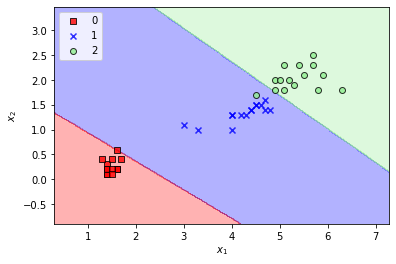

In [16]:
def main():
    # Load the Iris dataset for training and testing
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    # Subset the data for binary classification (classes 0 and 1)
    y_train_00_subset = y_train.copy()
    y_train_00_subset[(y_train == 0)] = 1
    y_train_00_subset[(y_train == 1) | (y_train == 2)] = -1

    y_train_02_subset = y_train.copy()
    y_train_02_subset[(y_train == 2)] = 1
    y_train_02_subset[(y_train == 0) | (y_train == 1)] = -1

    # Create and train the perceptron models
    ppn1 = Perceptron(eta=0.1, n_iter=300)
    ppn1.fit(X_train, y_train_00_subset)

    ppn2 = Perceptron(eta=0.1, n_iter=300)
    ppn2.fit(X_train, y_train_02_subset)

    # Create the classifier by combining the perceptron models
    clf = Classifier(ppn1, ppn2)

    # Plot the decision regions
    plot_decision_regions(X=X_test, y=y_test, classifier=clf)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()


if __name__ == '__main__':
    main()

## 2. Implement a multi-class classifier using logistic regression. Use a binary classifier for each class. An example of logistic regression for the binary case is provided below.
Napisz klasyfikator wielo-klasowy przy użyciu regresji logistycznej. Dla każdej z klas użyj klasyfikatora binarnego. Przykład regresji logistycznej dla przypadku dwuklasowego znajduje się poniżej.

In [17]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


# - `LogisticRegressionGD`: Implements logistic regression using gradient descent.
# - `GDClassifier`: Combines multiple logistic regression classifiers for multi-class classification.

class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta  # Learning rate
        self.n_iter = n_iter  # Number of iterations
        self.random_state = random_state  # Random seed

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # Initialize weights with random values
        self.cost_ = []  # List to store the cost function values during training

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)  # Update weights based on the gradient descent rule
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))  # Compute the cost function
            self.cost_.append(cost)  # Store the cost function value for each iteration
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]  # Calculate the net input

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))  # Apply the sigmoid activation function

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)  # Make predictions based on the net input

    def predict_sample(self, X):
        net_input = self.net_input(X)
        output = self.activation(net_input)
        return np.round(output, 3)  # Make predictions on a single sample with rounded output


class GDClassifier:
    def __init__(self, ppn1, ppn2, ppn3):
        self.ppn1 = ppn1  # First logistic regression classifier
        self.ppn2 = ppn2  # Second logistic regression classifier
        self.ppn3 = ppn3  # Third logistic regression classifier

    def predict(self, x):
        # Combine predictions from all classifiers for multi-class classification
        return np.where(self.ppn1.predict(x) == 1, 0,
                        np.where(self.ppn2.predict(x) == 1, 1, np.where(self.ppn3.predict(x) == 1, 2, 1)))

/var/folders/96/jhkcnt71777c05tl9c9k2ssc0000gn/T/ipykernel_52515/55279722.py:24: RuntimeWarning: divide by zero encountered in log
  cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/96/jhkcnt71777c05tl9c9k2ssc0000gn/T/ipykernel_52515/1338182360.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('

Prawdopodobieństwo przynależności próbki do klasy 0:  [0.    0.992 0.998 0.    0.    0.    0.    0.    0.    0.998 0.996 0.
 0.999 0.016 0.999 0.    0.    0.    0.    0.    0.    0.999 0.    0.
 0.    0.    0.027 0.    0.983 0.    0.998 0.999 0.001 0.    0.    0.
 0.999 0.998 0.999 0.    0.    0.    0.    0.999 0.999]
Prawdopodobieństwo przynależności próbki do klasy 1:  [0.    0.    0.    0.    0.    0.    0.001 0.    0.    0.    0.    0.
 0.    0.    0.    0.002 0.    0.    0.    0.    0.    0.003 0.    0.
 0.    0.    0.    0.    0.    0.    0.002 0.    0.045 0.    0.299 0.
 0.003 0.002 0.    0.001 0.    0.    0.    0.    0.011]
Prawdopodobieństwo przynależności próbki do klasy 2:  [1.    0.    0.    0.089 0.    0.    1.    0.002 1.    0.    0.    0.943
 0.    0.    0.    0.003 1.    0.002 0.    1.    1.    0.    0.    0.999
 0.    0.063 0.    1.    0.    0.999 0.    0.    0.    0.    1.    1.
 0.    0.    0.    0.001 1.    0.988 0.004 0.    0.   ]


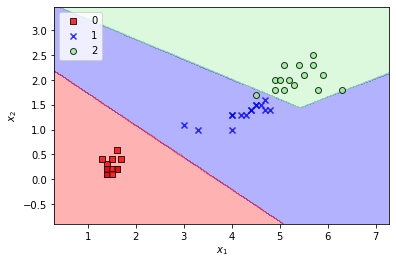

In [19]:
def main():
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    # Class selection
    y_train_00_subset = y_train.copy()
    y_train_00_subset[(y_train == 0)] = 1
    y_train_00_subset[(y_train == 1) | (y_train == 2)] = 0

    y_train_01_subset = y_train.copy()
    y_train_01_subset[(y_train == 1)] = 1
    y_train_01_subset[(y_train == 0) | (y_train == 2)] = 0

    y_train_02_subset = y_train.copy()
    y_train_02_subset[(y_train == 2)] = 1
    y_train_02_subset[(y_train == 0) | (y_train == 1)] = 0

    # Initialize and fit logistic regression models
    lrgd_1 = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
    lrgd_2 = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
    lrgd_3 = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)

    lrgd_1.fit(X_train, y_train_00_subset)
    lrgd_2.fit(X_train, y_train_01_subset)
    lrgd_3.fit(X_train, y_train_02_subset)

    # Make predictions on the testing set
    predict_lrgd_1 = lrgd_1.predict_sample(X_test)
    predict_lrgd_2 = lrgd_2.predict_sample(X_test)
    predict_lrgd_3 = lrgd_3.predict_sample(X_test)

    # Print the probabilities of each sample belonging to each class
    print("Probability of sample belonging to class 0: ", predict_lrgd_1)
    print("Probability of sample belonging to class 1: ", predict_lrgd_2)
    print("Probability of sample belonging to class 2: ", predict_lrgd_3)

    # Combine the logistic regression models using GDClassifier
    clf = GDClassifier(lrgd_1, lrgd_2, lrgd_3)

    # Plot the decision regions and the test set
    plot_decision_regions(X=X_test, y=y_test, classifier=clf)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()


if __name__ == '__main__':
    main()